In [20]:
!pip install pytesseract


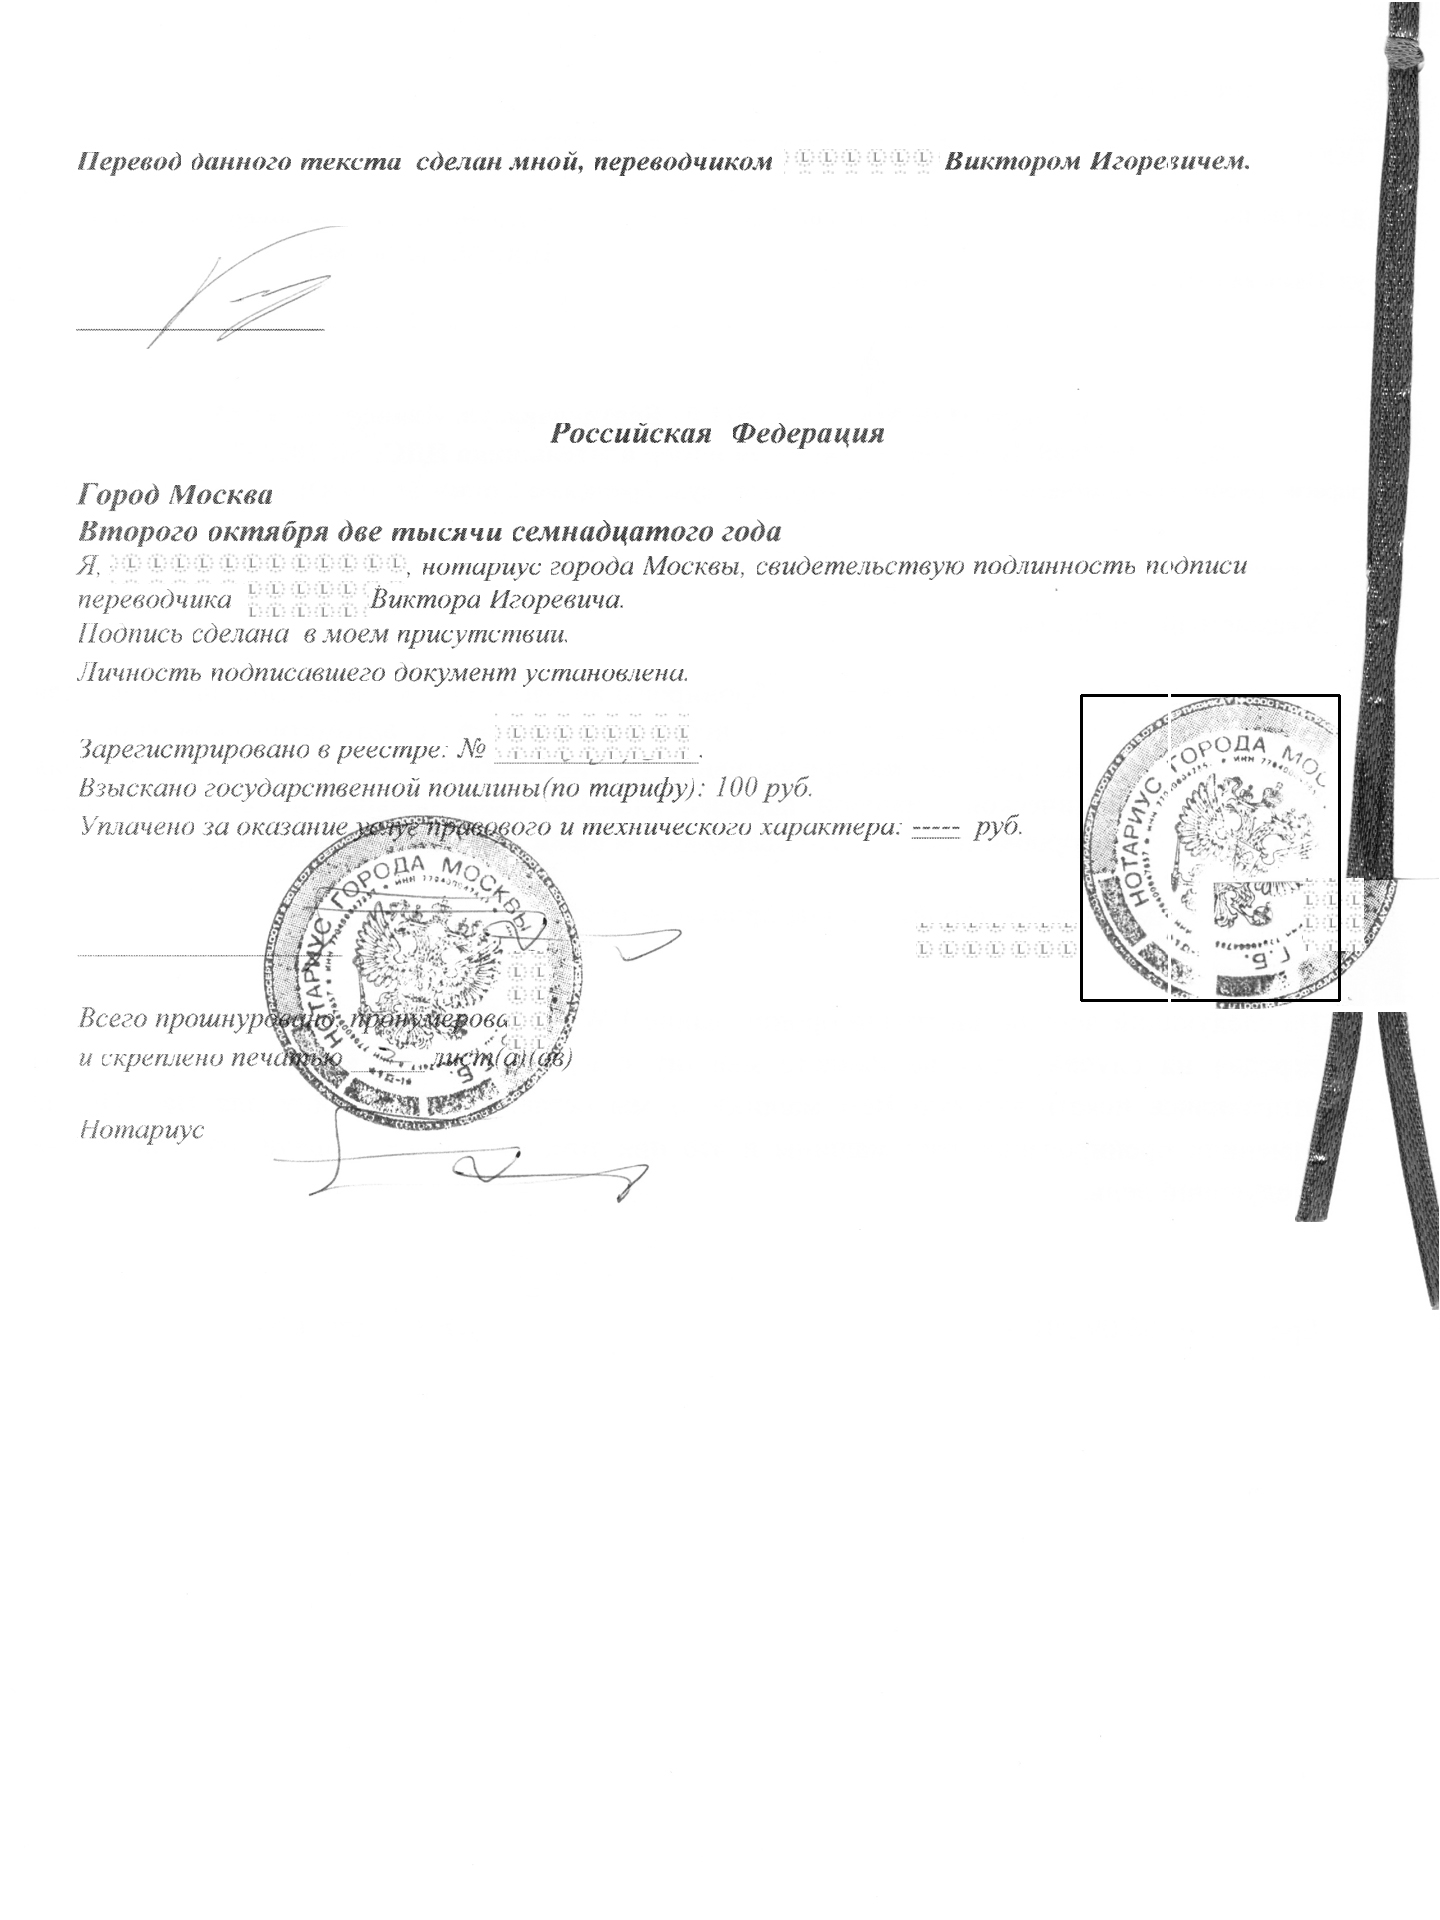

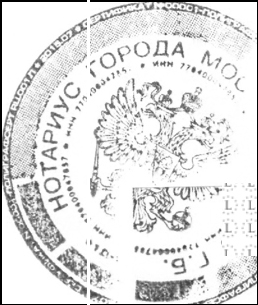

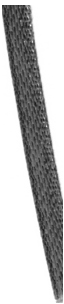

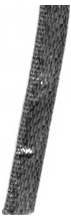

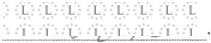

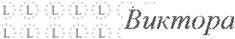

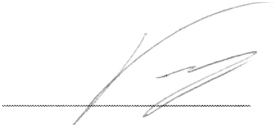

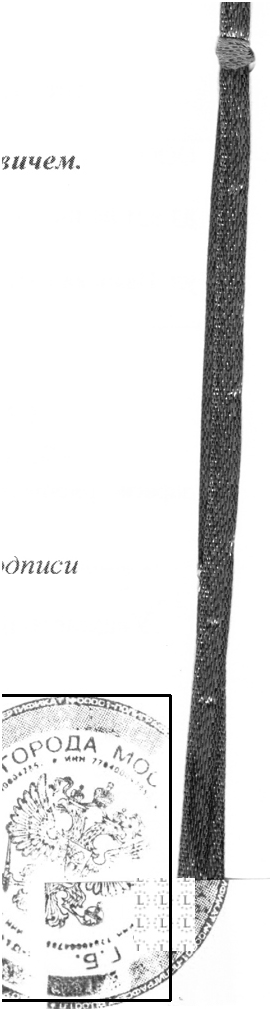

In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

def extract_stamp_and_signature(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Use adaptive thresholding
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Morphological operations
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize lists to hold extracted stamps and signatures
    extracted_stamps = []
    extracted_signatures = []

    # Loop through contours to find valid stamps and signatures
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 1000:  # Minimum area threshold
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = float(w) / h

            # Check for stamps (aspect ratio close to 1)
            if 0.8 < aspect_ratio < 1.2:
                stamp_roi = image[y:y+h, x:x+w]
                extracted_stamps.append(stamp_roi)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Check for signatures (aspect ratio elongated)
            elif aspect_ratio < 0.5 or aspect_ratio > 2.0:
                signature_roi = image[y:y+h, x:x+w]
                extracted_signatures.append(signature_roi)
                cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display the results
    cv2_imshow(image)  # Show the image with bounding rectangles
    for idx, stamp in enumerate(extracted_stamps):
        cv2_imshow(stamp)  # Show each extracted stamp
    for idx, signature in enumerate(extracted_signatures):
        cv2_imshow(signature)  # Show each extracted signature

    return extracted_stamps, extracted_signatures

# Usage
image_path = '/content/in-russ.jpg'  # Replace with your actual image path
stamps, signatures = extract_stamp_and_signature(image_path)

In [23]:
import cv2

# Load the image
img = cv2.imread('/content/istoriya.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [24]:
# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area
stamps = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:  # Adjust the area threshold as needed
        stamps.append(contour)

In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, Gaussian blur, Otsu's threshold, dilate
image = cv2.imread('/content/in-russ.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3, 3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
dilate = cv2.dilate(thresh, kernel, iterations=1)


In [27]:

# Find contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Create a mask for the stamp
mask = np.zeros_like(image)


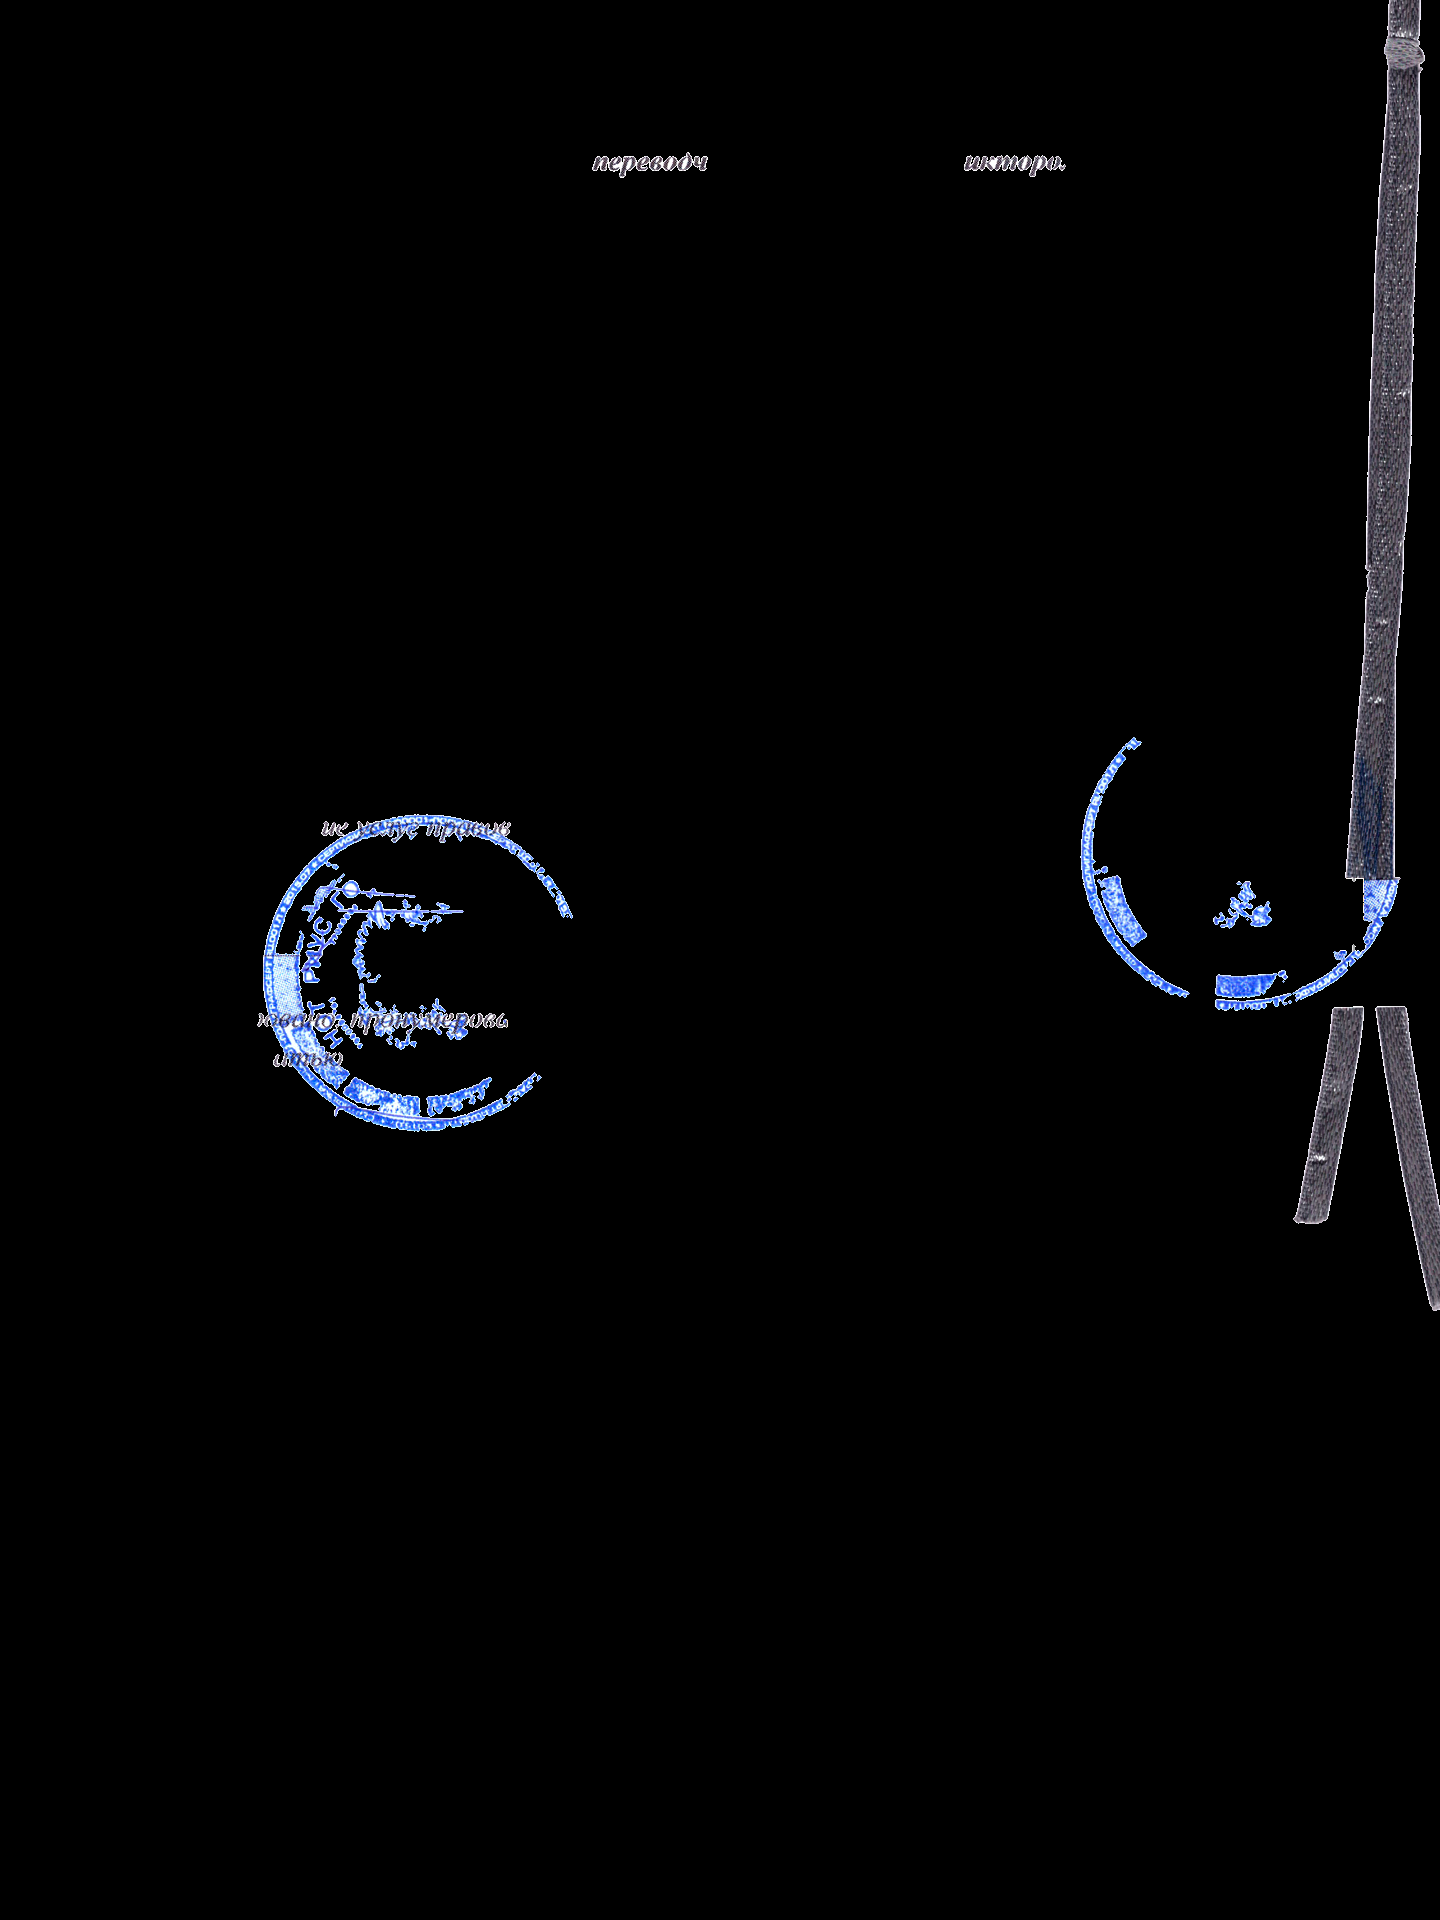

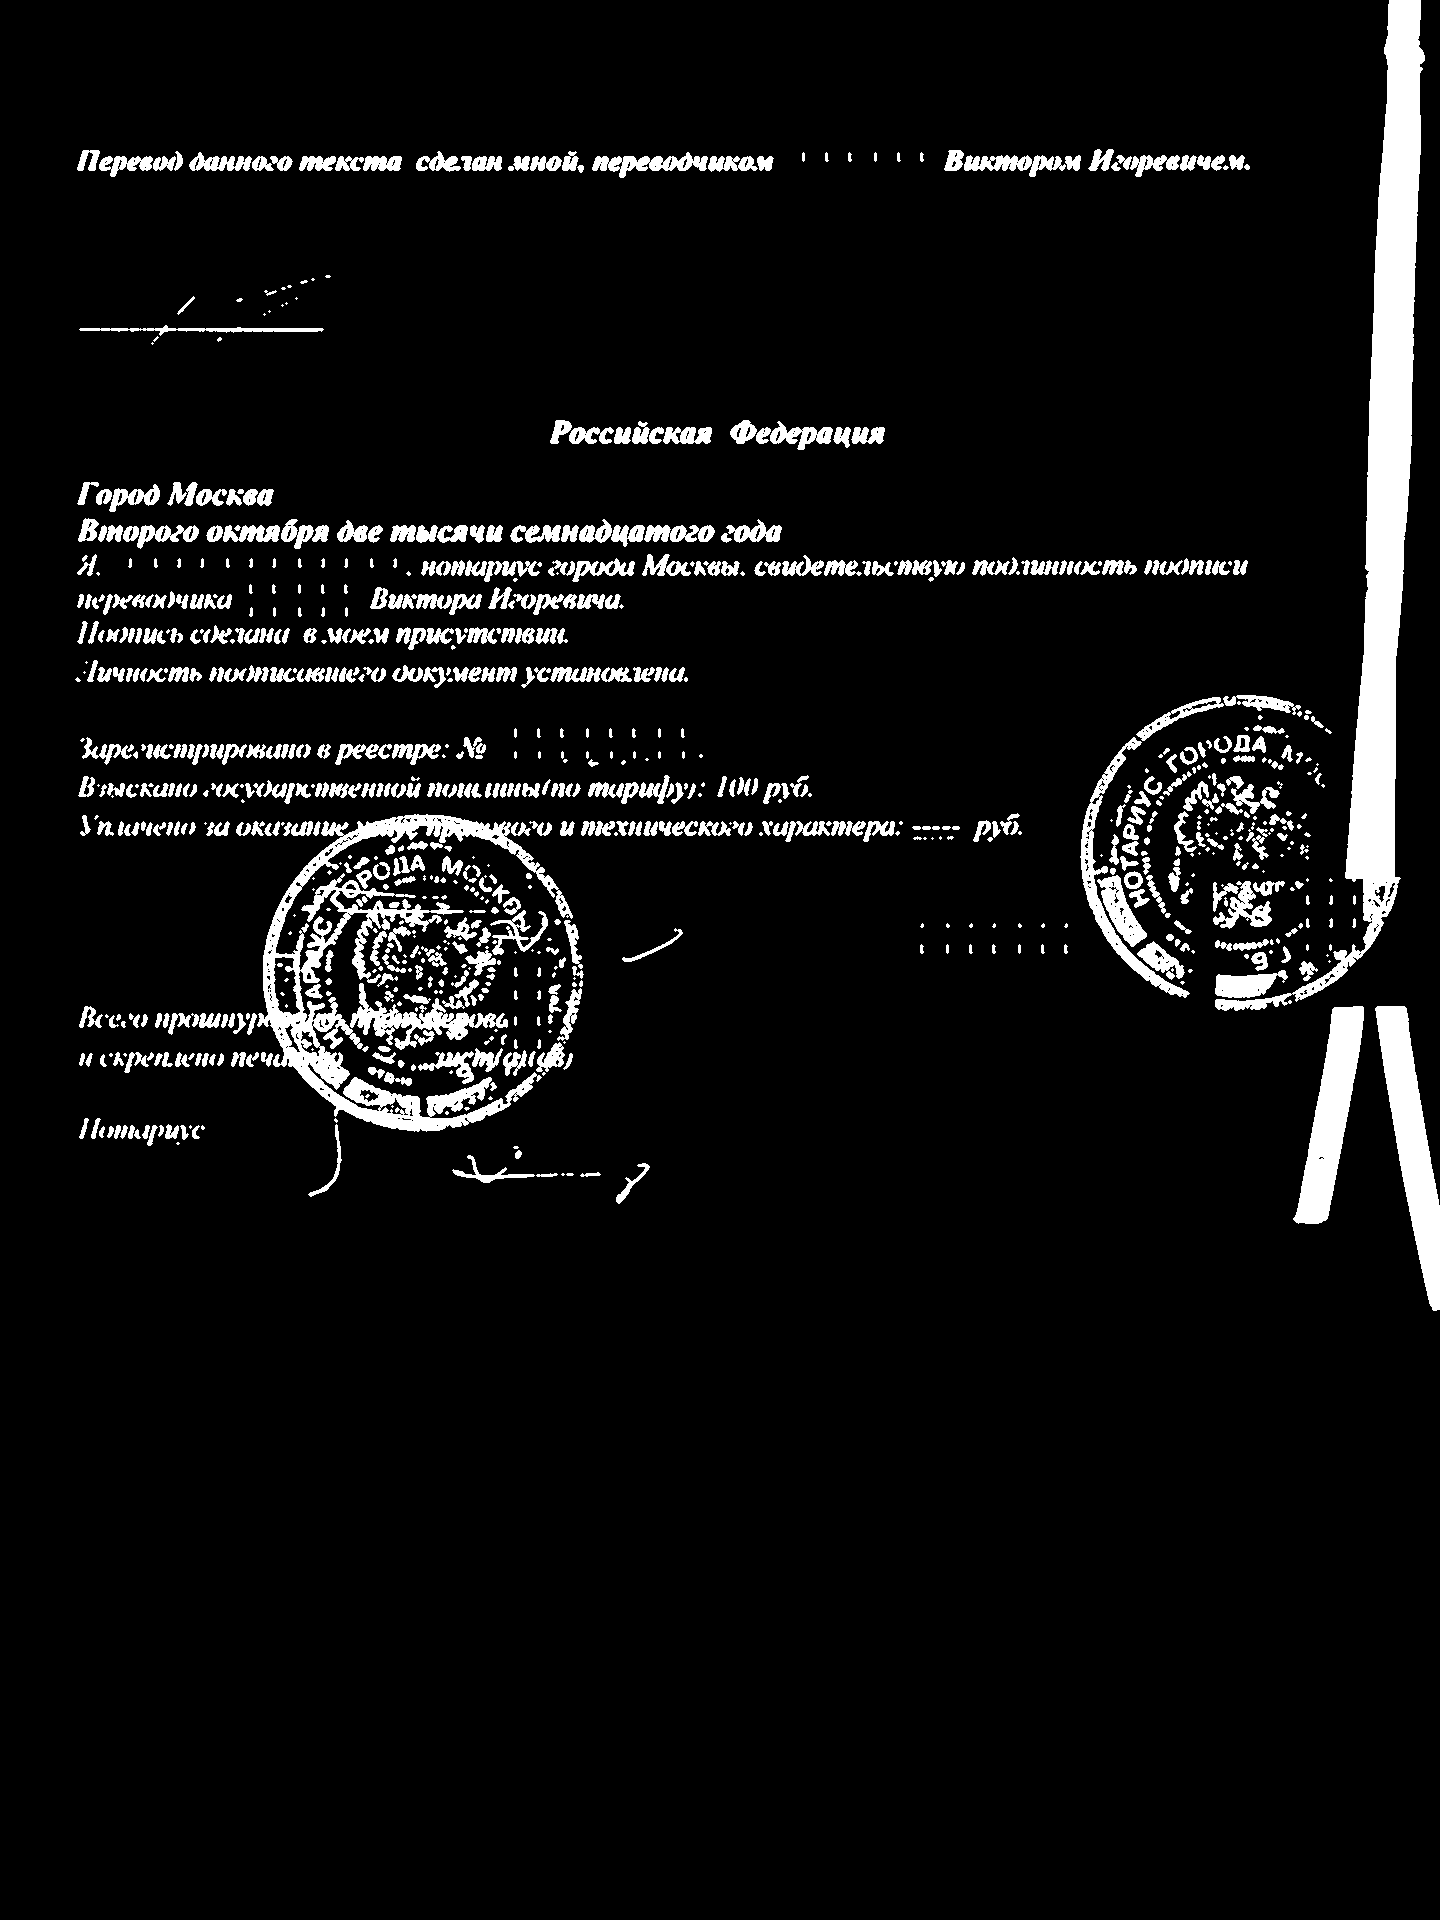

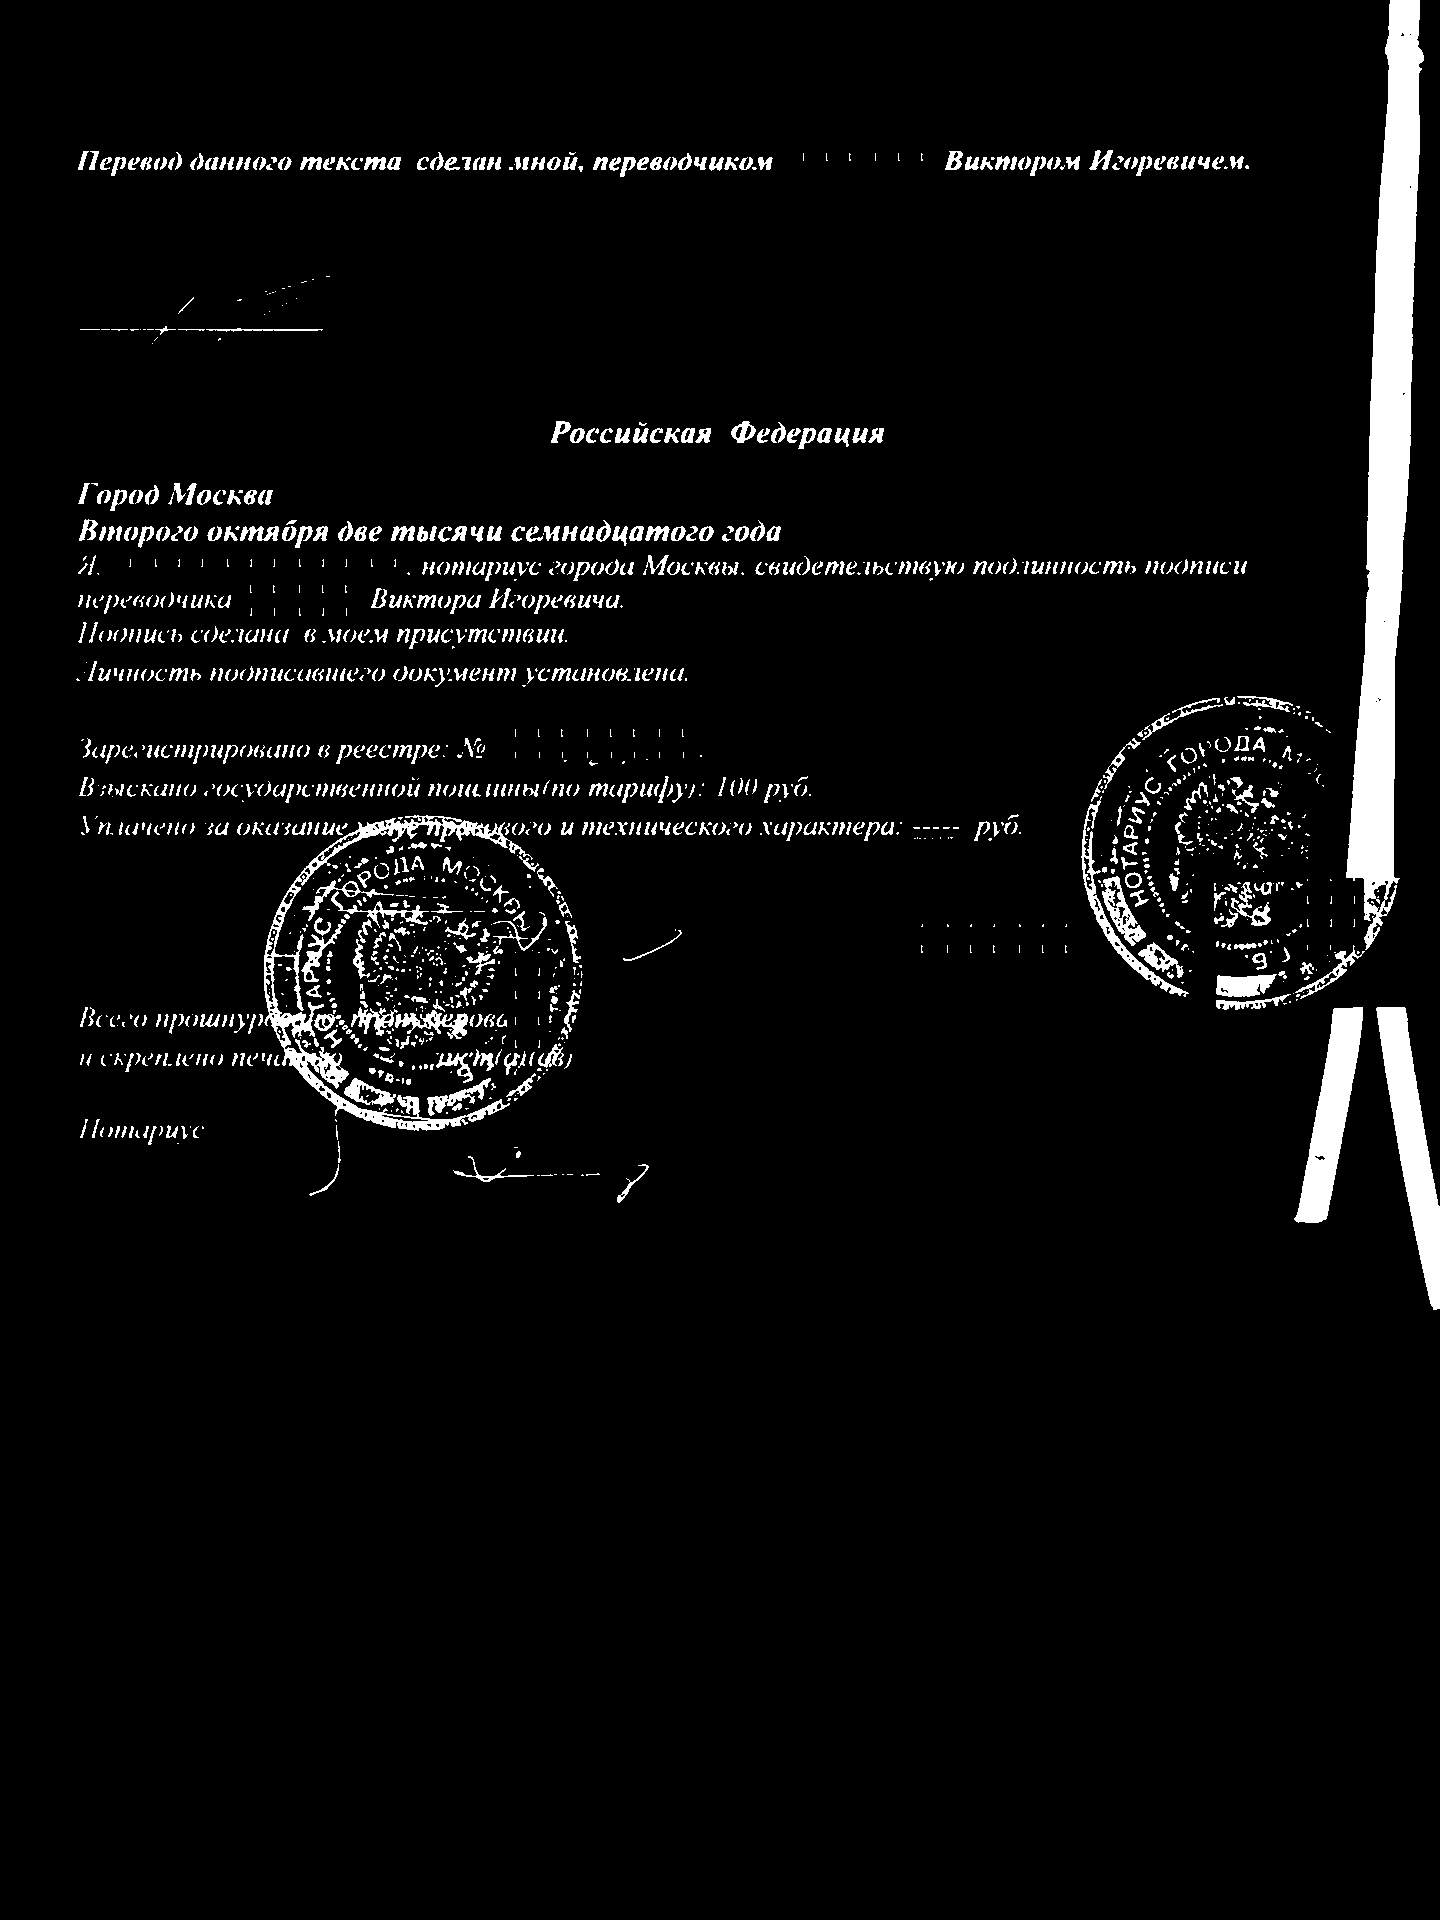

In [28]:

for c in cnts:
    area = cv2.contourArea(c)
    if area > 1000:  # Adjust this threshold based on your stamp size
        cv2.drawContours(mask, [c], -1, (255, 255, 255), thickness=cv2.FILLED)

# Extract the stamp using the mask
extracted_stamp = cv2.bitwise_and(image, mask)

# Display the results
cv2_imshow(extracted_stamp)
cv2_imshow(dilate)
cv2_imshow(thresh)